# Welcome to HW2

In this assignment you will be implementing a neural network in order to perform regression on the Airfoil Self-Noise data set. Remember to restart and run all cells before submission. Points will be deducted if you do not do this. When you are ready to submit, you can convert your notebook to a PDF file by printing the page either with `ctrl + p` or `command + p` and then saving as p1.pdf.

## The imports and helper functions should not be modified in any way.

In [86]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [87]:
def evaluate(model, test_data):
    '''
        Do not modify this code.
    '''
    test_loader = DataLoader(Dataset(test_data), batch_size=1)
    loss_fn = torch.nn.MSELoss()
    with torch.no_grad():
        total_loss = 0
        for x, y in test_loader:
            pred = model(x)
            total_loss += loss_fn(pred, y.view(-1,1)).item()
    print("TOTAL EVALUATION LOSS: {0:.5f}".format(total_loss))

In [88]:
def plot_training_curves(train_loss, val_loss, loss_fn_name, reduction):
    '''
        Do not modify this code.
    '''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(train_loss, label="Train Loss")
    ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title("Loss During Training", fontsize=16)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel("Loss: {}(reduction={})".format(loss_fn_name, reduction), fontsize=14)
    plt.savefig("./example_loss.pdf")
    plt.show()

## a) Implement your dataset object.

Do not modify the function definitions. Please note that the first five columns of the airfoil data are features and the last column is the target. Your dataset should have one attribute for the features, one attribute for the targets, and should return the specified features and target in `__getitem__()` as separate values.

In [89]:
class Dataset(torch.utils.data.Dataset):
    """Create your dataset here."""

    def __init__(self, airfoil_data):
        """
            Initialize your Dataset object with features and labels
        """
        ### Define your features and labels here
        self.features = airfoil_data[:,0:5]
        self.labels = airfoil_data[:,5]


    def __len__(self):
        ### Define the length of your data set
        return (len(self.features))

    def __getitem__(self, idx):
        ### Return the features and labels of your data for a given index
        feature = self.features[idx,0:5]
        label = self.labels[idx]
        
        feature = torch.tensor(feature,dtype=torch.float32)
        label = torch.tensor(label,dtype = torch.float32)

        return feature,label

## b) Implement the model architecture and `forward` function.

Do not modify the function definitions. You will need to define input, hidden, and output layers, as well as the activation function.

In [95]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[32], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()
        '''
            Implement your neural network here. You will need to add layers and an activation function.
            You are free to modify the number of layers in the hidden list.
        '''
        ### Define your input, hidden and output layers here
        self.lin1 = nn.Linear(input_dimension,hidden[0])
        self.lin2 = nn.Linear(hidden[0],hidden[1])
        self.lin3 = nn.Linear(hidden[1],hidden[2])
        self.lin4 = nn.Linear(hidden[2],hidden[3])
        self.lin5 = nn.Linear(hidden[3],hidden[4])
        self.lin6 = nn.Linear(hidden[4],output_dimension)
        self.act = activation
        ### Set your activation function here
        

    def forward(self, x):
        '''
            Implement the forward function using the layers and activation function you defined above.
        '''
        ### Call your hidden layers and activation function to do the forward pass through your network.
        x = self.lin1(x)
        x = self.act(x)
        x = self.lin2(x)
        x = self.act(x)
        x = self.lin3(x)
        x = self.act(x)
        x = self.lin4(x)
        x = self.act(x)
        x = self.lin5(x)
        x = self.act(x)
        x = self.lin6(x)

        return x

## c, d) Define hyperparameters and implement the training loop.

You will need to choose your loss function, number of epochs, optimizer learning rate, optimizer weight decay, and batch size for part (c). You will need to set up the DataLoader, implement the forward pass, and implement the backpropagation update.

In [96]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = nn.MSELoss()
    epochs = 3000
    learning_rate = 0.001
    weight_decay = 0.0001
    batch_size = 64

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        train_loss = 0
        for x, y in train_loader:

            # Make prediction with your model

            pred = model(x)

            # Calculate loss
            loss = loss_fn(pred,y.view(-1,1))
            
            train_loss += loss.item()

            # Backpropagate loss through the network and update parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        val_loss = 0
        with torch.no_grad():
            for x, y in validation_loader:

                # Make prediction with model.forward()
                pred = model.forward(x)

                # Calculate loss
                loss = loss_fn(pred,y.view(-1,1))

                val_loss += loss.item()


        # Feel free to modify how frequently training progress is printed
        if(ep%500 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p1_model.pt")
    return model

## e) Load your data, then train and evaluate your model before plotting the training curves.

  0%|          | 2/3000 [00:00<06:10,  8.09it/s]

Train Loss: 11.3520	Validation Loss: 2.4397


 17%|█▋        | 502/3000 [00:57<04:39,  8.93it/s]

Train Loss: 0.1922	Validation Loss: 0.2784


 33%|███▎      | 1002/3000 [01:57<03:57,  8.41it/s]

Train Loss: 0.1221	Validation Loss: 0.2745


 50%|█████     | 1503/3000 [02:57<02:47,  8.96it/s]

Train Loss: 0.1045	Validation Loss: 0.3147


 67%|██████▋   | 2002/3000 [03:55<01:56,  8.54it/s]

Train Loss: 0.1047	Validation Loss: 0.2668


 83%|████████▎ | 2502/3000 [04:55<00:56,  8.81it/s]

Train Loss: 0.0584	Validation Loss: 0.2430


100%|██████████| 3000/3000 [05:59<00:00,  8.34it/s]


TOTAL EVALUATION LOSS: 11.13950


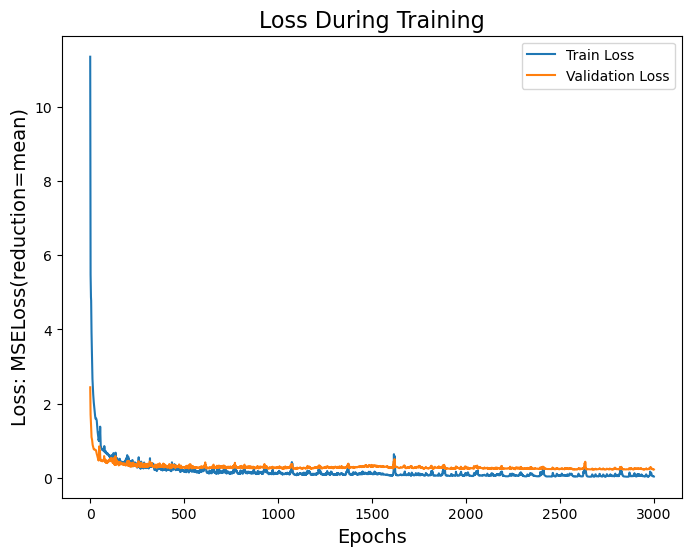

In [97]:
if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork(input_dimension=5,output_dimension=1,hidden=[128,256,512,256,128],activation = nn.GELU())
    
    model = train(model,train_data,validation_data)
    evaluate(model,test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.

    train_loss = np.load('train_losses.npy')
    val_loss = np.load('val_losses.npy')
    plot_training_curves(train_loss,val_loss,loss_fn_name="MSELoss",reduction="mean")

## f Run 4 different hyperparameter combinations and explain the differences in results

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<02:43,  6.11it/s]

Train Loss: 25.8555	Validation Loss: 1.9970


 20%|██        | 202/1000 [00:25<01:37,  8.18it/s]

Train Loss: 0.2317	Validation Loss: 0.2766


 40%|████      | 402/1000 [00:52<01:32,  6.45it/s]

Train Loss: 0.1580	Validation Loss: 0.2437


 60%|██████    | 602/1000 [01:17<00:46,  8.49it/s]

Train Loss: 0.1331	Validation Loss: 0.2504


 80%|████████  | 802/1000 [01:44<00:27,  7.14it/s]

Train Loss: 7.5122	Validation Loss: 3.1158


100%|██████████| 1000/1000 [02:17<00:00,  7.26it/s]


TOTAL EVALUATION LOSS: 276.44625


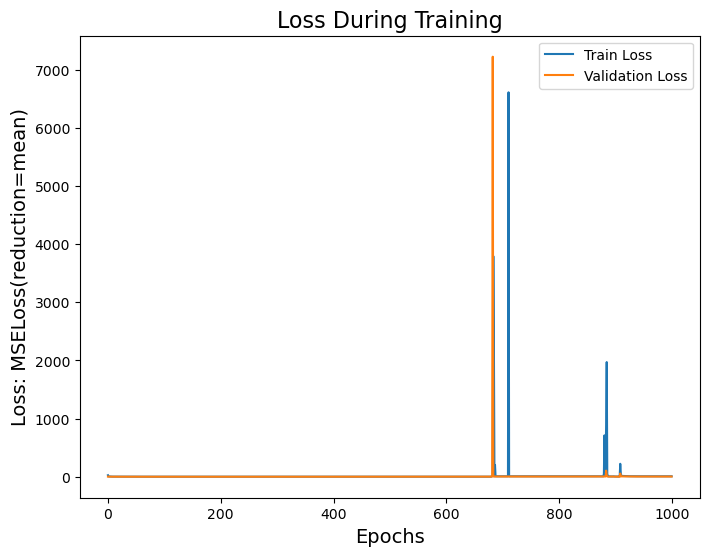

  0%|          | 1/2000 [00:00<09:35,  3.47it/s]

Train Loss: 17.9520	Validation Loss: 3.7931


 10%|█         | 201/2000 [00:57<09:55,  3.02it/s]

Train Loss: 0.5322	Validation Loss: 0.7939


 20%|██        | 402/2000 [01:47<05:04,  5.25it/s]

Train Loss: 0.3218	Validation Loss: 0.6576


 30%|███       | 602/2000 [02:27<04:39,  5.01it/s]

Train Loss: 0.2216	Validation Loss: 0.6459


 40%|████      | 802/2000 [03:07<03:58,  5.02it/s]

Train Loss: 0.3273	Validation Loss: 0.7036


 50%|█████     | 1002/2000 [03:47<03:28,  4.79it/s]

Train Loss: 0.1837	Validation Loss: 0.5928


 60%|██████    | 1202/2000 [04:29<02:42,  4.92it/s]

Train Loss: 0.2298	Validation Loss: 0.6312


 70%|███████   | 1401/2000 [05:08<01:56,  5.12it/s]

Train Loss: 0.1467	Validation Loss: 0.5821


 80%|████████  | 1601/2000 [05:50<01:21,  4.90it/s]

Train Loss: 0.0895	Validation Loss: 0.5829


 90%|█████████ | 1801/2000 [06:30<00:47,  4.18it/s]

Train Loss: 0.1935	Validation Loss: 0.5732


100%|██████████| 2000/2000 [07:11<00:00,  4.64it/s]


TOTAL EVALUATION LOSS: 12.78716


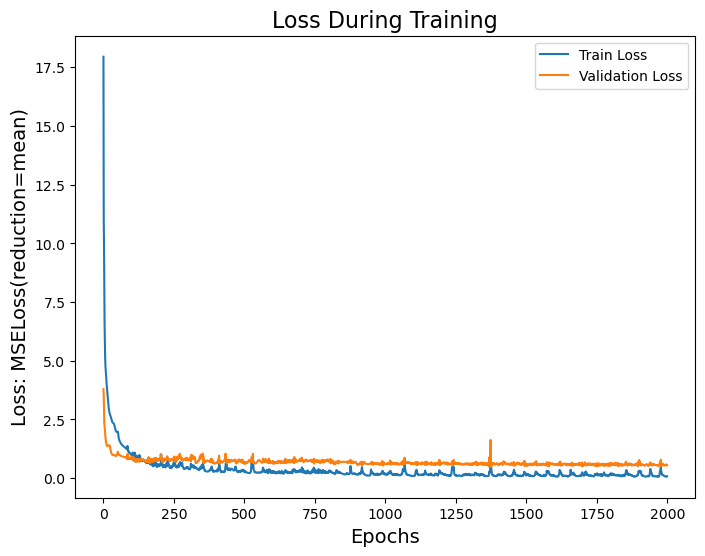

  0%|          | 2/1000 [00:00<02:33,  6.51it/s]

Train Loss: 13.9110	Validation Loss: 3.9300


 20%|██        | 202/1000 [00:26<02:01,  6.59it/s]

Train Loss: 2.4092	Validation Loss: 0.8889


 40%|████      | 402/1000 [00:53<01:16,  7.86it/s]

Train Loss: 2.1463	Validation Loss: 0.7920


 60%|██████    | 602/1000 [01:21<01:00,  6.61it/s]

Train Loss: 2.0308	Validation Loss: 0.7582


 80%|████████  | 802/1000 [01:48<00:25,  7.88it/s]

Train Loss: 1.9633	Validation Loss: 0.7430


100%|██████████| 1000/1000 [02:16<00:00,  7.34it/s]


TOTAL EVALUATION LOSS: 41.66925


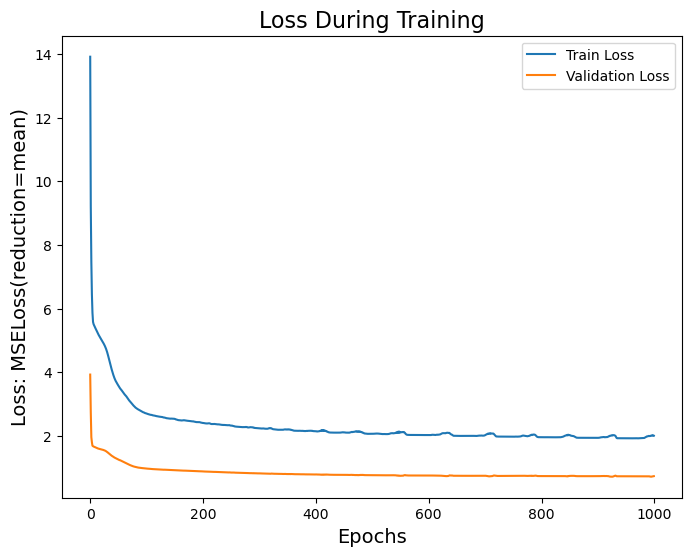

  0%|          | 2/1000 [00:00<02:19,  7.14it/s]

Train Loss: 11.4599	Validation Loss: 2.2203


 20%|██        | 202/1000 [00:25<01:38,  8.08it/s]

Train Loss: 0.4464	Validation Loss: 0.3269


 40%|████      | 402/1000 [00:50<01:16,  7.86it/s]

Train Loss: 0.2467	Validation Loss: 0.3098


 60%|██████    | 602/1000 [01:16<00:50,  7.87it/s]

Train Loss: 0.3012	Validation Loss: 0.3880


 80%|████████  | 802/1000 [01:41<00:22,  8.85it/s]

Train Loss: 0.0883	Validation Loss: 0.3389


100%|██████████| 1000/1000 [02:06<00:00,  7.91it/s]


TOTAL EVALUATION LOSS: 11.80886


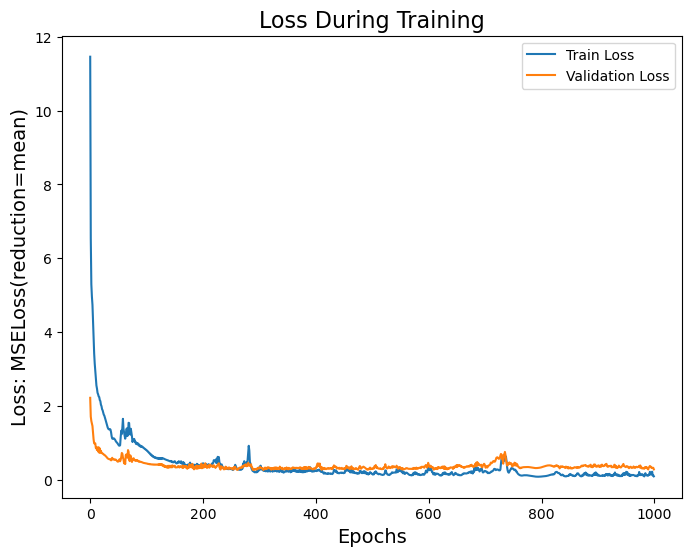

In [93]:
# Changing four different hyperparameters
# 4 parameters are learning rate, epoch, weight decay and batch size

def train(model, train_data, validation_data,lr = 0.005,epoch = 1000,weight_d = 0.0001,batch = 64):

    loss_fn = nn.MSELoss()
    epochs = epoch
    learning_rate = lr
    weight_decay = weight_d
    batch_size = batch

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        train_loss = 0
        for x, y in train_loader:

            # Make prediction with your model
            
            pred = model(x)

            # Calculate loss
            loss = loss_fn(pred,y.view(-1,1))
            
            train_loss += loss.item()

            # Backpropagate loss through the network and update parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        val_loss = 0
        with torch.no_grad():
            for x, y in validation_loader:

                # Make prediction with model.forward()
                pred = model.forward(x)

                # Calculate loss
                loss = loss_fn(pred,y.view(-1,1))

                val_loss += loss.item()


        # Feel free to modify how frequently training progress is printed
        if(ep%200 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p1_model.pt")
    return model


#parameters are learning rate, epochs, weight decay and batch size
parameters = [{'learning rate':0.01,'epochs':1000,'weight decay':0.0001,'batch size':128},
              {'learning rate':0.001,'epochs':2000,'weight decay':0.0001,'batch size':32},
              {'learning rate':0.001,'epochs':1000,'weight decay':0.01,'batch size':64},
              {'learning rate':0.001,'epochs':1000,'weight decay':0.0001,'batch size':64}]
    
if __name__ == '__main__':
    torch.manual_seed(137)
    
    for param in parameters:

        # Load in the provided data
        train_data = np.load('train_data.npy')
        validation_data = np.load('validation_data.npy')
        test_data = np.load('test_data.npy')

        model = NeuralNetwork(input_dimension=5,output_dimension=1,hidden=[128,256,512,256,128],activation = nn.GELU())
        
        model = train(model,train_data,validation_data,lr = param['learning rate'],epoch=param['epochs'],
                      weight_d=param['weight decay'],batch = param['batch size'])
        
        evaluate(model,test_data)

        # Load your training data and call the provided plot function. Loss function and reduction scheme are
        # required for the plotting function.

        train_loss = np.load('train_losses.npy')
        val_loss = np.load('val_losses.npy')
        plot_training_curves(train_loss,val_loss,loss_fn_name="MSELoss",reduction="mean")

## Explanation

The four parameters I made changes to are learning rate, epochs, weight decay and batch size. I used the same network and the loss function same for all the plots as MSELoss was giving the best results than any other losses. 

For the first plot, I made the learning rate of 0.01 which is larger than the others which showed the total evaluation error of 276.45 which is too high. This is because the overshoot is happening and that leads to instability in convergence. The higher learning rate is leading to unstable training behavior therefore making it difficult for the model to preduct how loss will chnage from one iteration to the next. 

For the second plot, I increased the epochs to 2000 and reduced the batch size to 32 which gave me an error of 12.78 which is good but not the best. This is because the model to overfitting as the model trains for too many epochs without proper regularization. Along with that, due to smaller batch size result in noiser gradient estimates which makes the process less stable. This leads to more time in convergence.

For the third plot, I increased the weight decay to 0.01 and the batch size to 128 which gave me an error of 41. This can happen because high weight decay may have lead it to underfit where the model could have become constrained and with higher batch size the generalization becomes difficuly and it impacts the training.

For the fourth plot, all the values were small and this gave us an error of 11.8 which is pretty good as the model is trained properly but the plot has some disturbances because of which I felt maybe it is underfitting a little.

Based on all the assumptions the graph I made at first which is giving me the best model is the one with higher epoch of 3000 and a batch size of 64. The learning rat ewas 0.001 and the weight decay was 0.0001. This gave me the best model with a score of 11.1. Therefore, I chose these hyperparameters for this model. 